## **Examen Final - Analisis Predictivo**
Sofía Weintraub - 62583

El **objetivo** de este trabajo final para la materia Analisis Predictivo es la necesidad de conocer el comportamiento de los viajeros que cancelaron reservas, para poder lanzar una campaña de marketing que busque disminuir la cantidad de cancelaciones.


Esto conlleva un **desafío**: lograr establecer un patrón de comportamiento de los clientes que han cancelado pedidos, mediante el uso de técnicas de Machine Learning

## Lectura Base de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import json
from google.colab import drive

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

drive.mount('/content/drive' , force_remount = True)
with open("/content/drive/My Drive/kaggle.json" , 'r') as f:
  api_token = json.load(f)

  with open('/root/.kaggle/kaggle.json' , 'w') as file:
    json.dump(api_token , file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d jessemostipak/hotel-booking-demand

import zipfile
import os

os.listdir()

for file in os.listdir():
  if file.endswith('.zip'):
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall()
    zip_ref.close()


Mounted at /content/drive
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 163MB/s]


In [ ]:
base = pd.read_csv("hotel_bookings.csv")

## Librerias Necesarias

In [ ]:
# Correlacion
import scipy.stats as ss
from scipy import stats
from scipy.stats import pearsonr
import itertools

#Split
from sklearn.model_selection import train_test_split

#Modelos
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,average_precision_score,ConfusionMatrixDisplay,f1_score,recall_score,precision_score
from sklearn.model_selection import RandomizedSearchCV,  KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier

## Análisis Exploratorio de Datos

In [ ]:
base.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#Tamaño
print('Cantidad de Filas y Columnas:',base.shape)

#Columnas
print('Nombre columnas:',base.columns)

Cantidad de Filas y Columnas: (119390, 32)
Nombre columnas: Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [ ]:
base.duplicated().sum()

31994

In [ ]:
#Elimino los registros duplicados
base.drop_duplicates(inplace = True)

In [ ]:
#Chequeo
base.duplicated().sum()

0

In [ ]:
base.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Missings

Es importante determinar la prevalencia de los datos faltantes y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra

In [ ]:
total = base.isnull().sum()
total1 = base.isnull().sum().sort_values(ascending = False)
percent = (base.isnull().sum() / base.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total1, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
company,82137,0.939826
agent,12193,0.139514
country,452,0.005172
children,4,0.000046
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


## Tratamiento Missings

**Variable *children***

In [ ]:
base.children.mode()

0    0.0
dtype: float64

In [ ]:
base['children'] = base.children.fillna(0)

**Variable *country***

Los missings de la variable country que figuran vacíos los clasificaré como *Otros*

In [ ]:
base['country'] = base.country.fillna('Other')

**Variable *agent***

In [ ]:
base.agent.describe()

count    75203.000000
mean        94.138306
std        113.188172
min          1.000000
25%          9.000000
50%         14.000000
75%        240.000000
max        535.000000
Name: agent, dtype: float64

Creo un nuevo ID = 536 para aquellos registros que están vacíos

In [ ]:
base['agent'] = base.agent.fillna(536)

**Variable *company***

Más del 93% de sus valores son faltantes, por lo que se decide eliminar esta variable

In [ ]:
base = base.drop(columns = 'company' , axis=1)

## Creación de Variables

**Cantidad de Noches Totales**

Se calcula en base a las noches reservadas en la semana (de lunes a viernes) y las noches reservadas que son fin de semana (sabados y domingos)

In [ ]:
base['noches_totales'] = base['stays_in_week_nights'] + base['stays_in_weekend_nights']

In [ ]:
base.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**Fecha de Llegada**

En base al anio, mes y dia, se crea una variable que unifica la fecha de llegada del cliente al hotel. 

In [ ]:
base['llegada'] = base['arrival_date_day_of_month'].astype('str') + '/' + base['arrival_date_month'].astype('str') + '/' + base['arrival_date_year'].astype('str')

In [ ]:
base['llegada'] = pd.to_datetime(base['llegada'], dayfirst= True)

**Familia**

Se considera una familia cuando hay adultos e hijos (ya sean ninios y/o bebes)

In [ ]:
base['familia'] = np.where((base['adults'] > 0) & (base['children'] + base['babies']) > 0,1,0)

**Ninios**

In [ ]:
base['total_child'] = (base['children'] + base['babies'] > 0).astype(int)

## Transformación de Variables

**Variable *country***

Creación de dummies

In [ ]:
dummies = base['country'].str.get_dummies(sep=',')

In [ ]:
repetidos = dummies.sum().sort_values(ascending=False)
repetidos = pd.DataFrame(repetidos, columns = ['count']).head(10)
repetidos

,count
PRT,27453
GBR,10433
FRA,8837
ESP,7252
DEU,5387
ITA,3066
IRL,3016
BEL,2081
BRA,1995
NLD,1911


Estos 10 países son los más visitados, por lo tanto, trabajaré unicamente con estos para el armado del modelo



In [ ]:
dummies = dummies[['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']]
dummies['PRT'] = dummies['PRT'].astype(int)
dummies['GBR'] = dummies['GBR'].astype(int)
dummies['FRA'] = dummies['FRA'].astype(int)
dummies['ESP'] = dummies['ESP'].astype(int)
dummies['DEU'] = dummies['DEU'].astype(int)
dummies['ITA'] = dummies['ITA'].astype(int)
dummies['IRL'] = dummies['IRL'].astype(int)
dummies['BEL'] = dummies['BEL'].astype(int)
dummies['BRA'] = dummies['BRA'].astype(int)
dummies['NLD'] = dummies['NLD'].astype(int)

<ipython-input-27-8f744426362f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummies['PRT'] = dummies['PRT'].astype(int)
<ipython-input-27-8f744426362f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummies['GBR'] = dummies['GBR'].astype(int)
<ipython-input-27-8f744426362f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

**Agrupo por continente**

In [ ]:
europa = ['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']

nortea = ['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

suda = ['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia = ['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa = ['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE']

oceania = ['AUS', 'NZL','FJI']

otros = ['CYM','CPV','JAM','GIB','JEY','GGY','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF', 'Other' ]

In [ ]:
base['continente'] = np.where(base['country'].isin(europa),"Europa", np.where(base['country'].isin(nortea),"Norteamerica",np.where(base['country'].isin(suda),"Sudamerica",np.where(base['country'].isin(asia),"Asia",np.where(base['country'].isin(africa),"Africa",np.where(base['country'].isin(oceania),"Oceania",np.where(base['country'].isin(otros),"Otros",0)))))))

In [ ]:
# Agrego las variables binarias al DataFrame
base = pd.concat([base, dummies], axis = 1)



In [ ]:
# Elimino la vairable original: country
base = base.drop(columns=['country'])

**Variable *meal***

In [ ]:
base.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
base.loc[base['meal'] == "BB", 'meal'] = '1'
base.loc[base['meal'] == "FB", 'meal'] = '2'
base.loc[base['meal'] == "HB", 'meal'] = '3'
base.loc[base['meal'] == "SC", 'meal'] = '4'
base.loc[base['meal'] == "Undefined", 'meal'] = '5'

base['meal'] = pd.to_numeric(base.meal,errors='coerce').astype('int16')

**Variable *Market Segment***

In [ ]:
base.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
base.loc[base['market_segment'] == "Direct", 'market_segment'] = '1'
base.loc[base['market_segment'] == "Corporate", 'market_segment'] = '2'
base.loc[base['market_segment'] == "Online TA", 'market_segment'] = '3'
base.loc[base['market_segment'] == "Offline TA/TO", 'market_segment'] = '4'
base.loc[base['market_segment'] == "Complementary", 'market_segment'] = '5'
base.loc[base['market_segment'] == "Groups", 'market_segment'] = '6'
base.loc[base['market_segment'] == "Aviation", 'market_segment'] = '7'
base.loc[base['market_segment'] == "Undefined", 'market_segment'] = '8'

base['market_segment'] = pd.to_numeric(base.market_segment,errors='coerce').astype('int16')

**Variable *Distribution Channel***

In [ ]:
base.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
base.loc[base['distribution_channel'] == "Direct", 'distribution_channel'] = '1'
base.loc[base['distribution_channel'] == "Coroporate", 'distribution_channel'] = '2'
base.loc[base['distribution_channel'] == "TA/TO", 'distribution_channel'] = '3'
base.loc[base['distribution_channel'] == "GDS", 'distribution_channel'] = '4'
base.loc[base['distribution_channel'] == "Undefined", 'distribution_channel'] = '5'
base['distribution_channel'] = pd.to_numeric(base.distribution_channel,errors='coerce').fillna('5').astype('int16')

**Variable *Reserved Room Type***

In [ ]:
base.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
base.loc[base['reserved_room_type'] == "A", 'reserved_room_type'] = '1'
base.loc[base['reserved_room_type'] == "B", 'reserved_room_type'] = '2'
base.loc[base['reserved_room_type'] == "C", 'reserved_room_type'] = '3'
base.loc[base['reserved_room_type'] == "D", 'reserved_room_type'] = '4'
base.loc[base['reserved_room_type'] == "E", 'reserved_room_type'] = '5'
base.loc[base['reserved_room_type'] == "F", 'reserved_room_type'] = '6'
base.loc[base['reserved_room_type'] == "G", 'reserved_room_type'] = '7'
base.loc[base['reserved_room_type'] == "H", 'reserved_room_type'] = '8'
base.loc[base['reserved_room_type'] == "L", 'reserved_room_type'] = '9'
base.loc[base['reserved_room_type'] == "P", 'reserved_room_type'] = '10'

base['reserved_room_type'] = pd.to_numeric(base.reserved_room_type,errors='coerce').astype('int16')

**Variable *Assigned Room Type***

In [ ]:
base.assigned_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [ ]:
base.loc[base['assigned_room_type'] == "A", 'assigned_room_type'] = '1'
base.loc[base['assigned_room_type'] == "B", 'assigned_room_type'] = '2'
base.loc[base['assigned_room_type'] == "C", 'assigned_room_type'] = '3'
base.loc[base['assigned_room_type'] == "D", 'assigned_room_type'] = '4'
base.loc[base['assigned_room_type'] == "E", 'assigned_room_type'] = '5'
base.loc[base['assigned_room_type'] == "F", 'assigned_room_type'] = '6'
base.loc[base['assigned_room_type'] == "G", 'assigned_room_type'] = '7'
base.loc[base['assigned_room_type'] == "H", 'assigned_room_type'] = '8'
base.loc[base['assigned_room_type'] == "I", 'assigned_room_type'] = '9'
base.loc[base['assigned_room_type'] == "K", 'assigned_room_type'] = '10'
base.loc[base['assigned_room_type'] == "L", 'assigned_room_type'] = '11'
base.loc[base['assigned_room_type'] == "P", 'assigned_room_type'] = '12'


base['assigned_room_type'] = pd.to_numeric(base.assigned_room_type,errors='coerce').astype('int16')

**Variable *Deposit Type***

In [ ]:
base.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
base.loc[base['deposit_type'] == "No Deposit", 'deposit_type'] = '1'
base.loc[base['deposit_type'] == "Refundable", 'deposit_type'] = '2'
base.loc[base['deposit_type'] == "Non Refund", 'deposit_type'] = '3'

base['deposit_type'] = pd.to_numeric(base.deposit_type,errors='coerce').astype('int16')

**Variable *Customer Type***

In [ ]:
base.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
base.loc[base['customer_type'] == "Transient", 'customer_type'] = '1'
base.loc[base['customer_type'] == "Contract", 'customer_type'] = '2'
base.loc[base['customer_type'] == "Transient-Party", 'customer_type'] = '3'
base.loc[base['customer_type'] == "Group", 'customer_type'] = '4'

base['customer_type'] = pd.to_numeric(base.customer_type,errors='coerce').astype('int16')

**Variable *Reservation Status***

In [ ]:
base.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
base.loc[base['reservation_status'] == "Check-Out", 'reservation_status'] = '1'
base.loc[base['reservation_status'] == "Canceled", 'reservation_status'] = '2'
base.loc[base['reservation_status'] == "No-Show", 'reservation_status'] = '3'

base['reservation_status'] = pd.to_numeric(base.reservation_status,errors='coerce').astype('int16')

**Variable *Arrival Date Month***

In [ ]:
base.loc[base['arrival_date_month'] == "January", 'arrival_date_month'] = '01'
base.loc[base['arrival_date_month'] == "February", 'arrival_date_month'] = '02'
base.loc[base['arrival_date_month'] == "March", 'arrival_date_month'] = '03'
base.loc[base['arrival_date_month'] == "April", 'arrival_date_month'] = '04'
base.loc[base['arrival_date_month'] == "May", 'arrival_date_month'] = '05'
base.loc[base['arrival_date_month'] == "June", 'arrival_date_month'] = '06'
base.loc[base['arrival_date_month'] == "July", 'arrival_date_month'] = '07'
base.loc[base['arrival_date_month'] == "August", 'arrival_date_month'] = '08'
base.loc[base['arrival_date_month'] == "September", 'arrival_date_month'] = '09'
base.loc[base['arrival_date_month'] == "October", 'arrival_date_month'] = '10'
base.loc[base['arrival_date_month'] == "November", 'arrival_date_month'] = '11'
base.loc[base['arrival_date_month'] == "December", 'arrival_date_month'] = '12'

base['arrival_date_month'] = pd.to_numeric(base.arrival_date_month,errors='coerce').astype('int16')

## Outliers

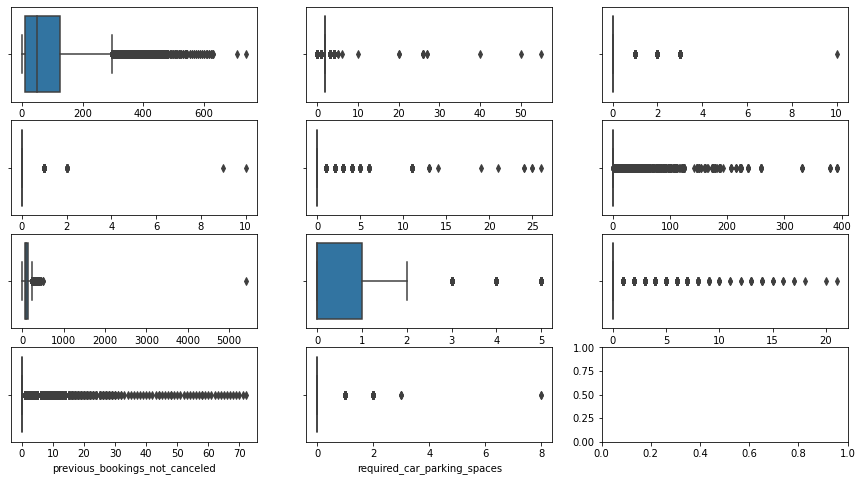

In [ ]:
fig, axs = plt.subplots(4,3, figsize=(15, 8))

sb.boxplot(x=base["lead_time"],ax=axs[0,0])
sb.boxplot(x=base["adults"],ax=axs[0,1])
sb.boxplot(x=base["children"],ax=axs[0,2])
sb.boxplot(x=base["babies"],ax=axs[1,0])
sb.boxplot(x=base["previous_cancellations"],ax=axs[1,1])
sb.boxplot(x=base["days_in_waiting_list"],ax=axs[1,2])
sb.boxplot(x=base["adr"],ax=axs[2,0])
sb.boxplot(x=base["total_of_special_requests"],ax=axs[2,1])
sb.boxplot(x=base["booking_changes"],ax=axs[2,2])
sb.boxplot(x=base["previous_bookings_not_canceled"],ax=axs[3,0])
sb.boxplot(x=base["required_car_parking_spaces"],ax=axs[3,1])

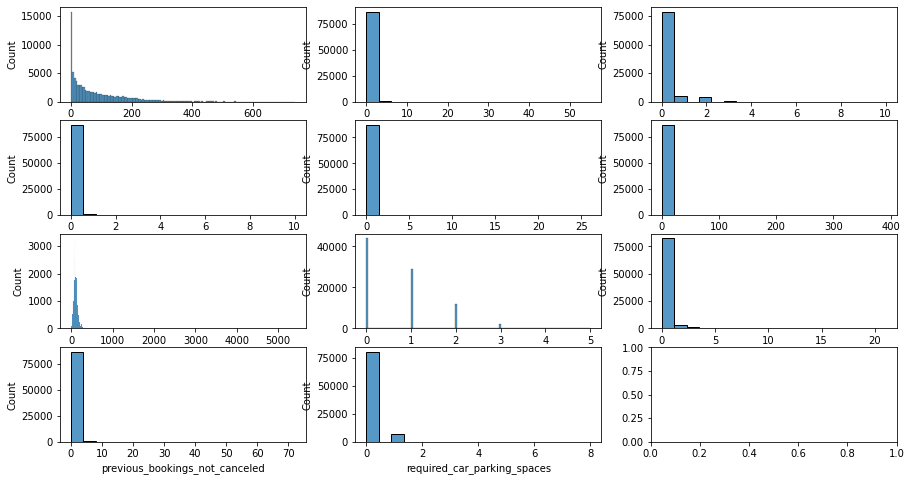

In [ ]:
fig, axs = plt.subplots(4,3, figsize=(15, 8))

sb.histplot(x=base["lead_time"],ax=axs[0,0])
sb.histplot(x=base["adults"],ax=axs[0,1])
sb.histplot(x=base["children"],ax=axs[0,2])
sb.histplot(x=base["babies"],ax=axs[1,0])
sb.histplot(x=base["previous_cancellations"],ax=axs[1,1])
sb.histplot(x=base["days_in_waiting_list"],ax=axs[1,2])
sb.histplot(x=base["adr"],ax=axs[2,0])
sb.histplot(x=base["total_of_special_requests"],ax=axs[2,1])
sb.histplot(x=base["booking_changes"],ax=axs[2,2])
sb.histplot(x=base["previous_bookings_not_canceled"],ax=axs[3,0])
sb.histplot(x=base["required_car_parking_spaces"],ax=axs[3,1])

## Tratamiento Outliers

**Lead Time**

In [ ]:
base[(base.lead_time > 400)] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,1,0,0,0,0,0,0,0,0,0
890,Resort Hotel,0,460,2015,8,32,3,2,5,1,...,0,1,0,0,0,0,0,0,0,0
4182,Resort Hotel,0,709,2016,2,9,25,8,20,2,...,0,1,0,0,0,0,0,0,0,0
5704,Resort Hotel,1,468,2016,5,20,12,0,2,2,...,1,0,0,0,0,0,0,0,0,0
5713,Resort Hotel,1,468,2016,5,20,12,0,2,2,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118952,City Hotel,0,457,2017,8,34,25,0,2,2,...,0,0,0,0,0,0,0,0,0,0
119053,City Hotel,0,518,2017,8,34,26,2,1,2,...,0,0,0,0,0,0,0,0,0,0
119057,City Hotel,0,518,2017,8,34,26,2,1,2,...,0,1,0,0,0,0,0,0,0,0
119102,City Hotel,0,518,2017,8,34,26,2,1,1,...,1,0,0,0,0,0,0,0,0,0


**Adults**

In [ ]:
base[(base.adults < 1)] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD
2224,Resort Hotel,0,1,2015,10,41,6,0,3,0,...,1,0,0,0,0,0,0,0,0,0
2409,Resort Hotel,0,0,2015,10,42,12,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3181,Resort Hotel,0,36,2015,11,47,20,1,2,0,...,0,0,0,1,0,0,0,0,0,0
3684,Resort Hotel,0,165,2015,12,53,30,1,4,0,...,1,0,0,0,0,0,0,0,0,0
3708,Resort Hotel,0,165,2015,12,53,30,2,4,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,7,30,27,1,3,0,...,0,1,0,0,0,0,0,0,0,0
117274,City Hotel,0,276,2017,7,31,30,2,1,0,...,0,0,0,0,1,0,0,0,0,0
117303,City Hotel,0,291,2017,7,30,29,2,2,0,...,1,0,0,0,0,0,0,0,0,0
117453,City Hotel,0,159,2017,7,31,31,1,3,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
ai = base.loc[base['adults'] < 1].index

In [ ]:
base.drop(ai , axis=0,inplace = True)

**Children**

In [ ]:
base.loc[base['children'] == 10, ['children']] = 0

**Babies**

In [ ]:
base.loc[base['babies'] > 3, ['babies']] = 0

**ADR**

In [ ]:
base = base.drop(base[base['adr'] < 0].index)
base.loc[base['adr'] == 5400, ['adr']] = 0

**Required car parking spaces**

In [ ]:
base = base.drop(base[base['required_car_parking_spaces'] == 8].index)

## Correlacion

In [ ]:
base.corr(method="spearman")

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD
is_canceled,1.000000,0.226094,0.087282,0.002539,0.000691,0.005523,0.059919,0.095475,0.091236,0.060212,...,0.125290,-0.069901,-0.059126,-0.012152,-0.045702,0.032273,-0.022821,-0.027038,0.030296,-0.031304
lead_time,0.226094,1.000000,0.136885,0.101073,0.097942,0.011844,0.295633,0.418035,0.235725,0.047769,...,-0.190152,0.159198,0.010050,-0.086167,0.089024,0.026254,0.089896,0.041220,0.011982,0.011286
arrival_date_year,0.087282,0.136885,1.000000,-0.500517,-0.515886,-0.010886,0.010093,0.018000,0.060100,0.044802,...,-0.165880,0.057978,0.029969,-0.033239,0.047737,0.009700,0.021588,0.031437,0.038983,0.015074
arrival_date_month,0.002539,0.101073,-0.500517,1.000000,0.995247,-0.001501,0.035938,0.044318,0.028446,0.016846,...,0.021285,-0.007246,-0.008517,0.027085,-0.016836,0.000129,-0.000482,-0.001364,-0.016353,-0.010543
arrival_date_week_number,0.000691,0.097942,-0.515886,0.995247,1.000000,0.086962,0.037423,0.041821,0.026952,0.017038,...,0.023219,-0.008294,-0.010104,0.027137,-0.016172,0.000651,-0.001384,-0.001515,-0.016586,-0.009922
arrival_date_day_of_month,0.005523,0.011844,-0.010886,-0.001501,0.086962,1.000000,-0.008818,-0.017336,0.003924,0.016085,...,0.010804,-0.002157,-0.017085,-0.002798,0.002421,0.006163,-0.005027,-0.000260,0.005784,0.002860
stays_in_weekend_nights,0.059919,0.295633,0.010093,0.035938,0.037423,-0.008818,1.000000,0.326103,0.133415,0.036171,...,-0.140630,0.134067,0.013103,-0.041488,0.024239,-0.003478,0.090784,0.014933,0.007857,0.006249
stays_in_week_nights,0.095475,0.418035,0.018000,0.044318,0.041821,-0.017336,0.326103,1.000000,0.174907,0.045394,...,-0.159410,0.160473,0.020925,-0.038006,0.026855,-0.008834,0.115297,0.012539,-0.009236,0.009367
adults,0.091236,0.235725,0.060100,0.028446,0.026952,0.003924,0.133415,0.174907,1.000000,0.089020,...,-0.173584,0.039424,0.066931,0.050249,0.021695,0.037451,0.032756,0.030968,0.041105,0.007303
children,0.060212,0.047769,0.044802,0.016846,0.017038,0.016085,0.036171,0.045394,0.089020,1.000000,...,-0.017622,-0.021712,-0.001231,0.037553,-0.028081,0.005636,-0.017584,-0.001384,0.021830,-0.000798


In [ ]:
corr = base.corr(method = 'spearman')["is_canceled"]
corr.abs().sort_values(ascending=False)[1:]

reservation_status                0.997898
lead_time                         0.226094
required_car_parking_spaces       0.186413
deposit_type                      0.156980
adr                               0.142456
agent                             0.134660
total_of_special_requests         0.128165
customer_type                     0.127325
previous_cancellations            0.126674
PRT                               0.125290
booking_changes                   0.123725
noches_totales                    0.104108
previous_bookings_not_canceled    0.103574
stays_in_week_nights              0.095475
adults                            0.091236
is_repeated_guest                 0.088706
arrival_date_year                 0.087282
GBR                               0.069901
assigned_room_type                0.065106
children                          0.060212
stays_in_weekend_nights           0.059919
FRA                               0.059126
distribution_channel              0.056315
familia    

In [ ]:
copia = base[['is_canceled','lead_time', 'required_car_parking_spaces', 'deposit_type', 'PRT',
              'total_of_special_requests', 'previous_cancellations', 'customer_type', 'adr', 
              'booking_changes', 'agent', 'previous_bookings_not_canceled', 'arrival_date_year', 'GBR', 'adults', 
              'is_repeated_guest', 'noches_totales', 'stays_in_week_nights', 'FRA', 'assigned_room_type',
              'children', 'DEU']]

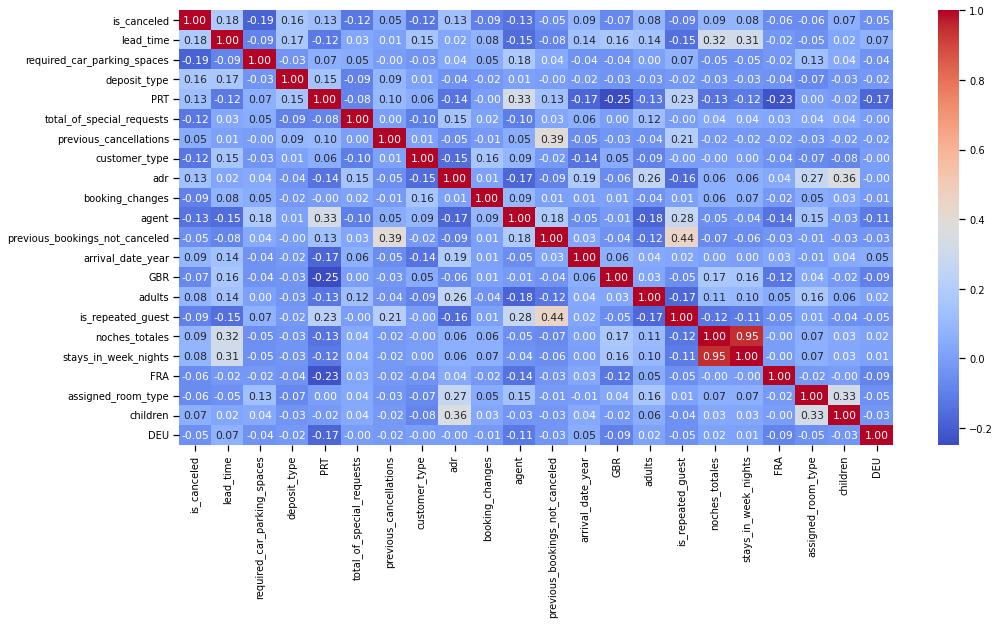

In [ ]:
sb.set_context('notebook', font_scale=0.9)
fig, ax = plt.subplots(figsize=(16, 8))
sb.heatmap(ax = ax, data = copia.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

**Chequeo dependencia**

In [ ]:
r, p = stats.pearsonr(base['is_canceled'], base['reservation_status'])
print(f"Correlación Pearson: r={r}, p-value={p}")

r, p = stats.spearmanr(base['is_canceled'], base['reservation_status'])
print(f"Correlación Spearman: r={r}, p-value={p}")

r, p = stats.kendalltau(base['is_canceled'], base['reservation_status'])
print(f"Correlación Pearson: r={r}, p-value={p}")

Correlación Pearson: r=0.9752786922094545, p-value=0.0
Correlación Spearman: r=0.9978979348697259, p-value=0.0
Correlación Pearson: r=0.9924192938343849, p-value=0.0


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Los test estadísticos muestran una correlación lineal alta, con claras evidencias estadísticas de que la relación observada se debe al azar (p-value = 0.0). Es por eso que se decide no tomar en cuenta a la variable *reservation_status* para el análisis. 

In [ ]:
base['cancelacion'] = np.where(base['is_canceled'] == 0, 'No', 'Yes')

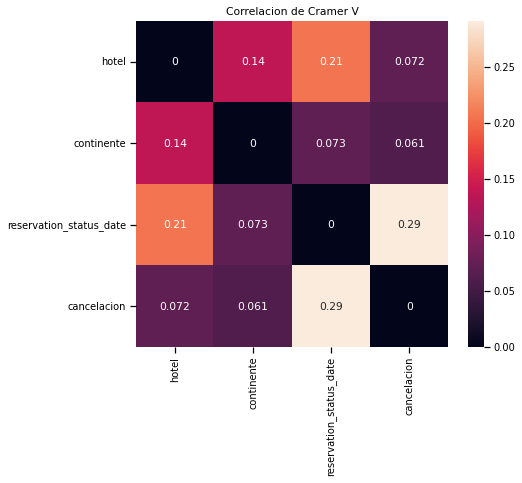

In [ ]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorical-categorical association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))


cols = ["hotel", "continente", "reservation_status_date","cancelacion" ]
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(base[col1], base[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sb.heatmap(corr, annot=True, ax=ax); ax.set_title("Correlacion de Cramer V");

## Graficos Exploratorios

Text(0, 0.5, 'Cantidad')

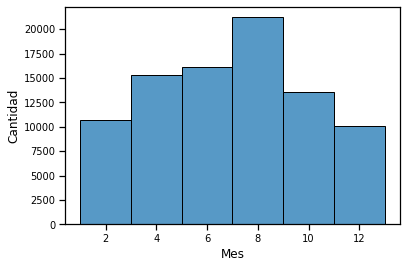

In [ ]:
graph = sb.histplot(data=base, x="arrival_date_month", binwidth = 2)
graph.set_xlabel('Mes', fontsize = 12)
graph.set_ylabel('Cantidad', fontsize = 12)

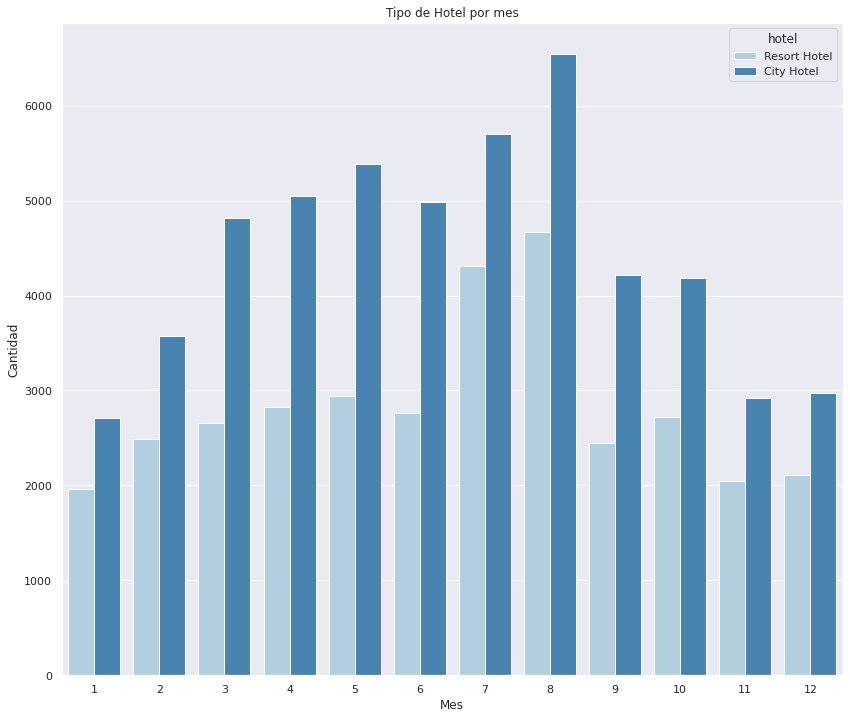

In [203]:
sb.set(rc={'figure.figsize':(14,12)})
graph = sb.countplot(x = 'arrival_date_month',hue='hotel', data=base, palette = 'Blues')
graph.set(title='Tipo de Hotel por mes')
graph.set_xlabel('Mes', fontsize = 12)
graph.set_ylabel('Cantidad', fontsize = 12)
plt.show()

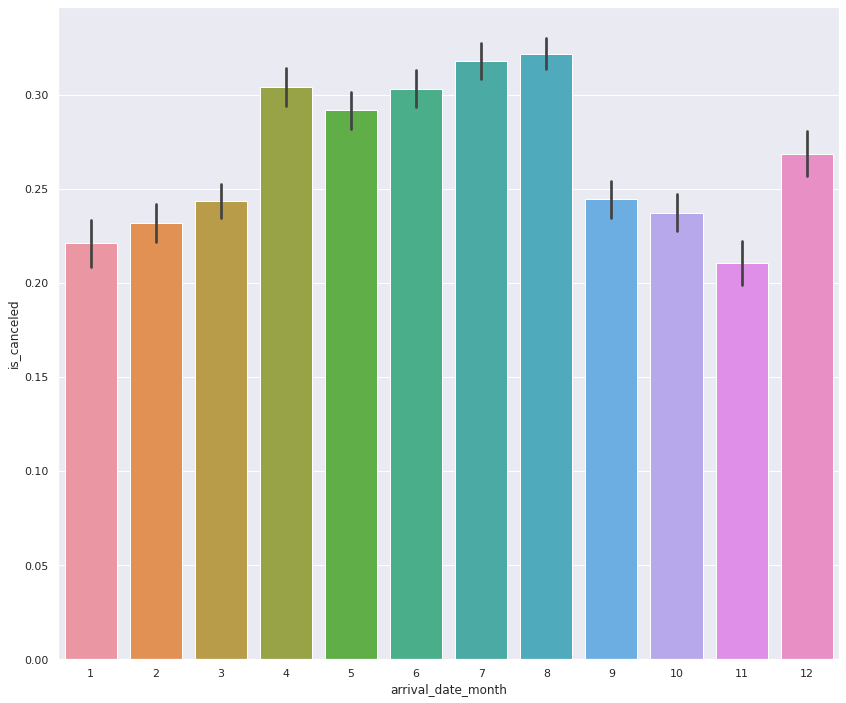

In [ ]:
sb.barplot(x="arrival_date_month", y="is_canceled", data=base)

Claro está que quienes viajan, eligen hacerlo principalmente en Agosto. 

Ahora me pregunto si será mas determinante la epoca del anio dependiendo de quien viaja: Importa que sea una familia, por ejemplo?

In [206]:
data_familia = base[base['familia'] == 1]
data_nofamilia = base[base['familia'] == 0]

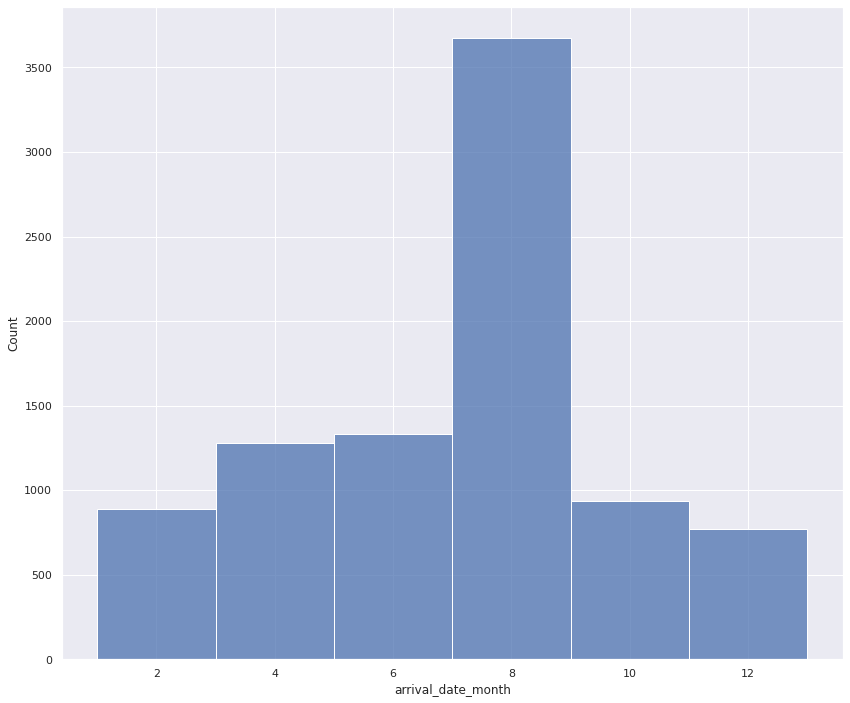

In [ ]:
sb.histplot(data=data_familia, x="arrival_date_month", binwidth = 2)

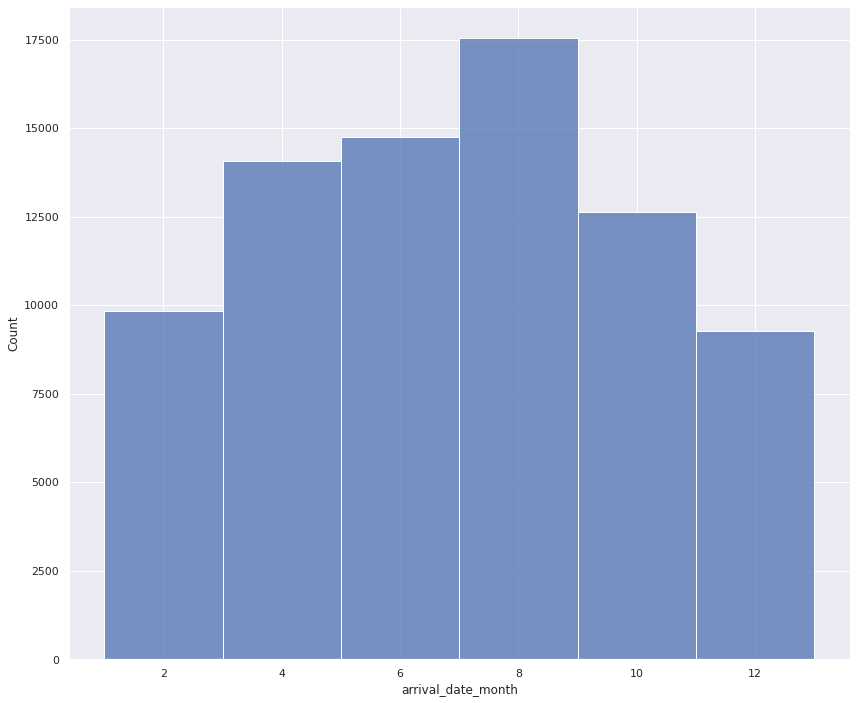

In [ ]:
sb.histplot(data=data_nofamilia, x="arrival_date_month", binwidth = 2)

Se observa que las familias que viajan lo hacen principalmente (y con una diferencia notoria) en Agosto.

Mientras que aquellos que no viajan en familia lo hacen de una forma mas pareja a lo largo del anio. Aunque, se observa que Agosto tambien es el mes mas elegido por ellos para viajar.

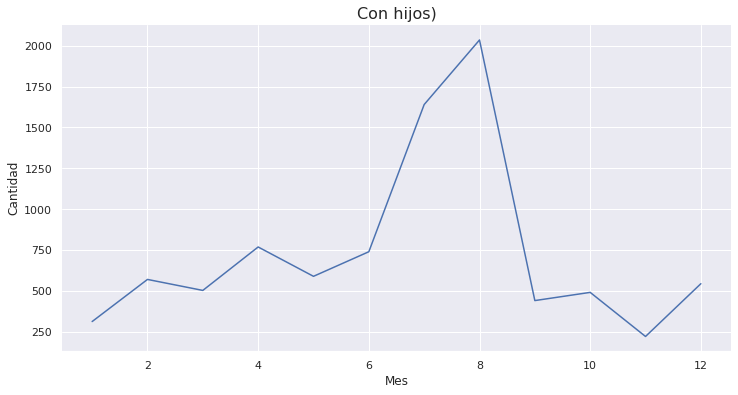

In [ ]:
#Como es el comportamiento entre los meses, de las personas que viajan con hijos
cm = base[base['total_child'] == 1].groupby(['arrival_date_month'], as_index=False).size()

cm.rename(columns={"arrival_date_month": "Mes", "size": "Cantidad"}, inplace=True)

plt.figure(figsize=(12,6))
sb.lineplot(
    data=cm,
    x='Mes', y='Cantidad'
)
plt.title('Con hijos)', fontsize = 16)
sb.despine(left=True)

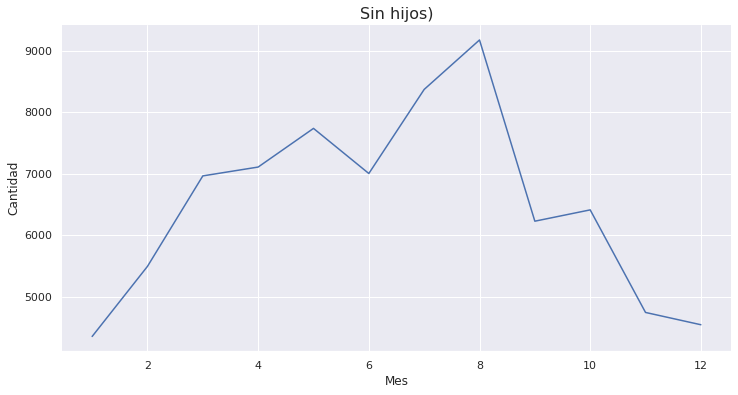

In [ ]:
#Como es el comportamiento entre los meses, de las personas que viajan sin hijos
cm = base[base['total_child'] == 0].groupby(['arrival_date_month'], as_index=False).size()

cm.rename(columns={"arrival_date_month": "Mes", "size": "Cantidad"}, inplace=True)

plt.figure(figsize=(12,6))
sb.lineplot(
    data=cm,
    x='Mes', y='Cantidad'
)
plt.title('Sin hijos)', fontsize = 16)
sb.despine(left=True)

Ya sea en familia, o no, se puede observar un comportamiento similar dado que en ambos casos se observa un pico en Agosto. 

In [ ]:
def season(x):
    if x in [12,1,2]:
        return "Winter"
    if x in[3,4,5]:
        return "Spring"
    if x in[6,7,8]:
        return "Summer"
    if x in[9,10,11]:
        return "Autum"

In [ ]:
base['season']=base['arrival_date_month'].apply(season)

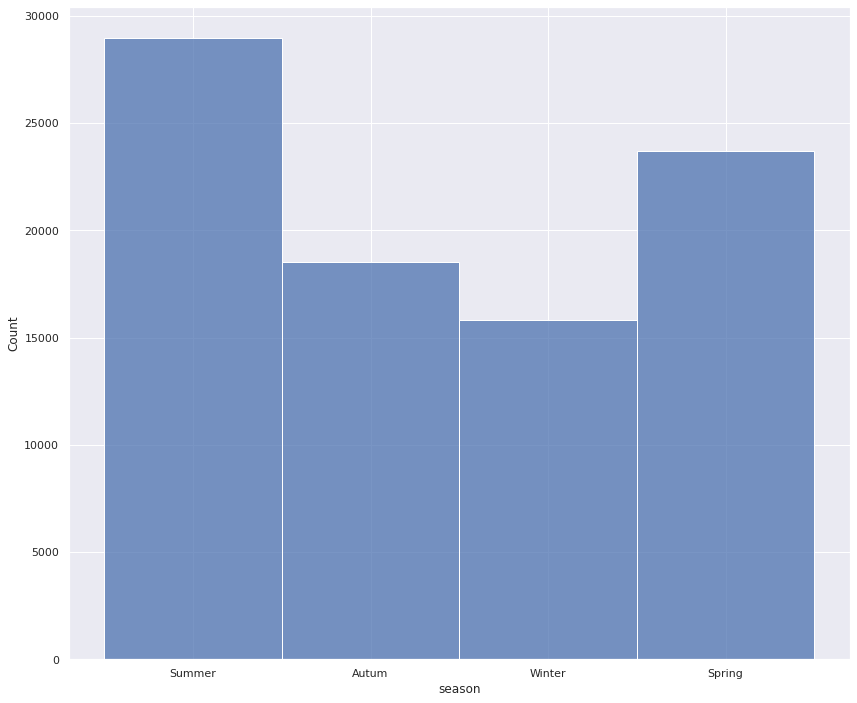

In [ ]:
sb.histplot(data=base, x="season", binwidth = 2)

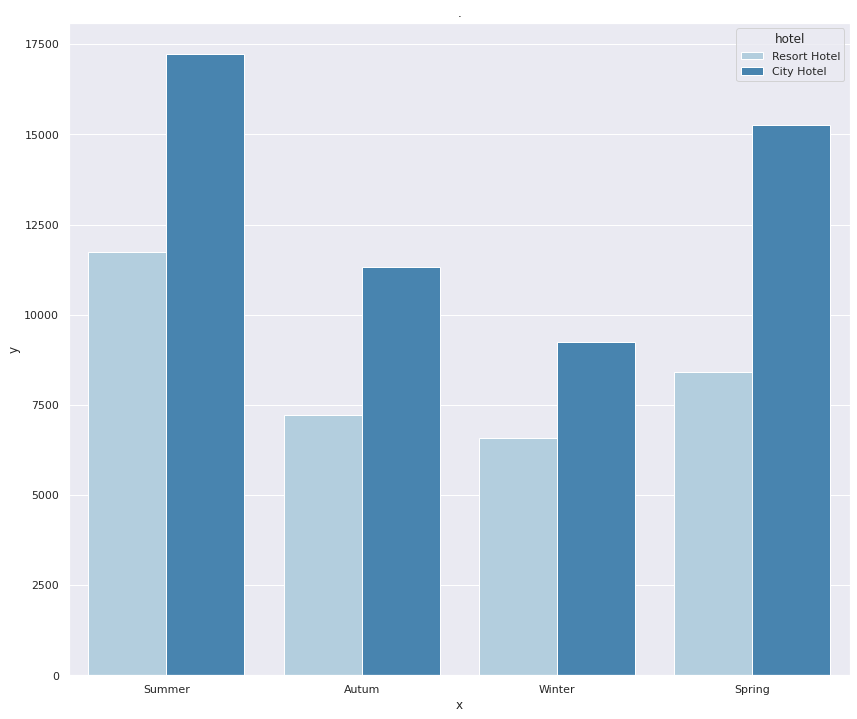

In [207]:
sb.set(rc={'figure.figsize':(14,12)})
graph = sb.countplot(x = 'season',hue='hotel', data=base, palette = 'Blues')
graph.set(title='.')
graph.set_xlabel('x', fontsize = 12)
graph.set_ylabel('y', fontsize = 12)
plt.show()

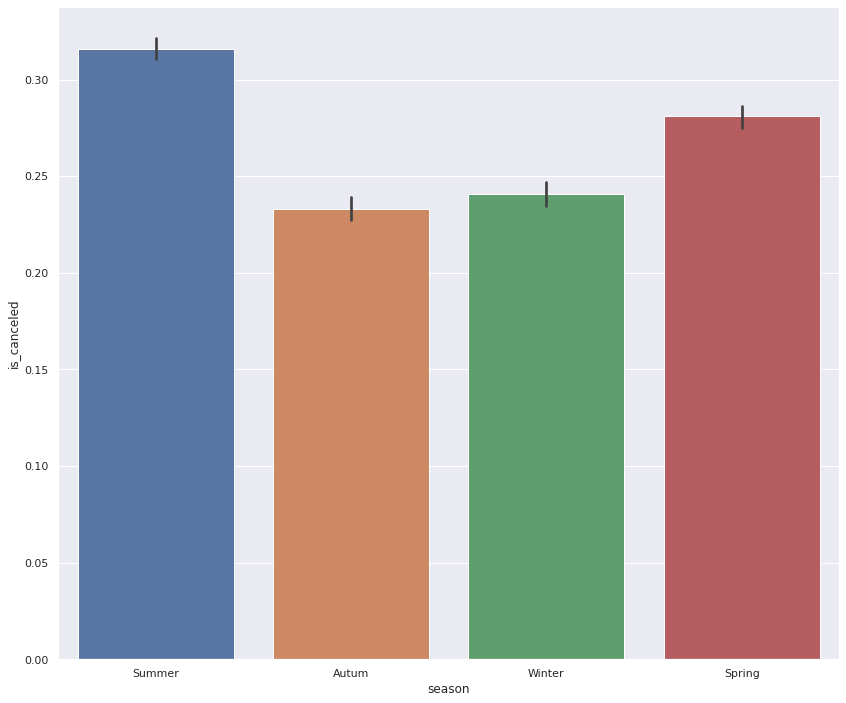

In [ ]:
sb.barplot(x="season", y="is_canceled", data=base)

Al hacer esta division por estacion del anio, me pregunto: como varia el precio de la reserva en funcion a cada estacion?

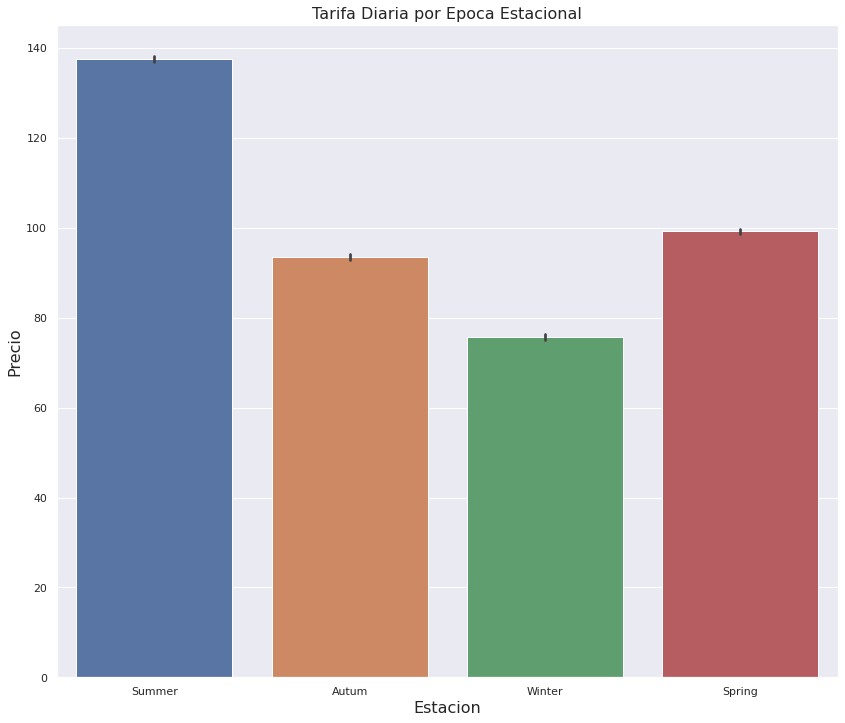

In [ ]:
sb.barplot(data = base , x='season' , y ='adr')
plt.title("Tarifa Diaria por Epoca Estacional", fontsize=16)
plt.xlabel("Estacion", fontsize=16)
plt.ylabel("Precio", fontsize=16)
plt.show()

Toma sentido entonces que los precios más altos se encuentran en verano. No es casualidad que verano sea también la época del anio mas solicitada para viajar.

**Zona** (Continente y País)

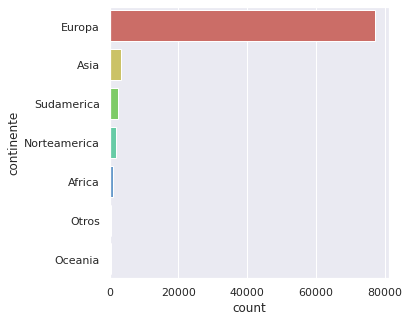

In [208]:
fig, ax = plt.subplots(figsize=(5,5))
sb.set_theme(style="darkgrid")
ax = sb.countplot(y="continente", data=base, order = base['continente'].value_counts().index, palette = 'hls')

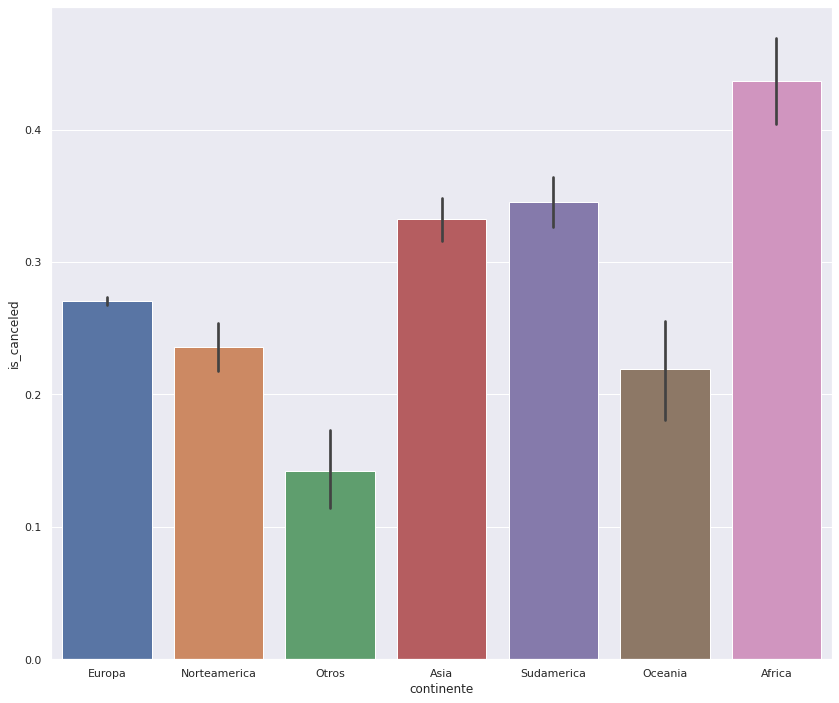

In [210]:
sb.barplot(x="continente", y="is_canceled", data=base)

Qué tipo de hotel eligen de acuerdo a su país de origen?

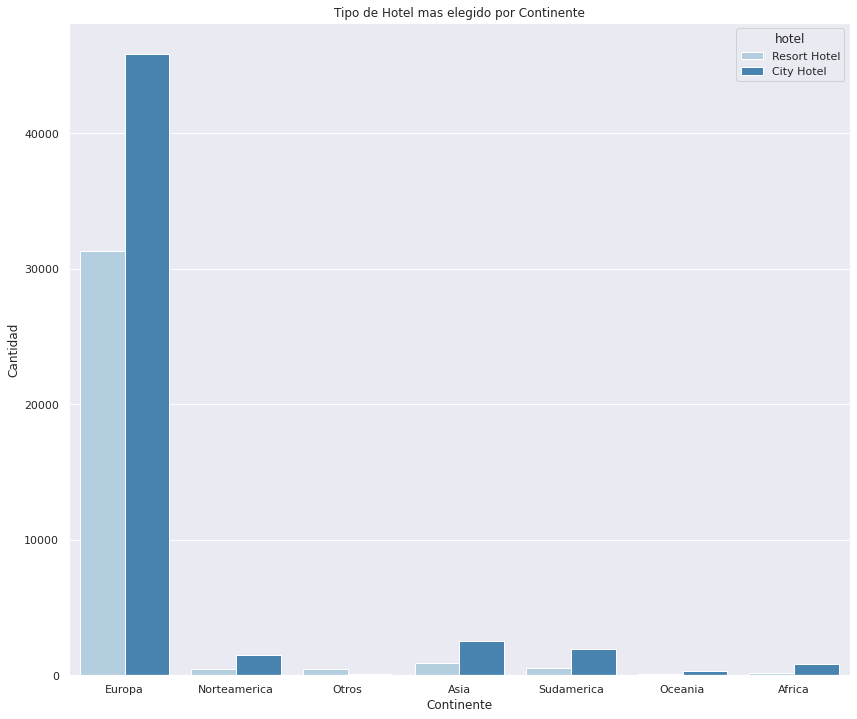

In [211]:
sb.set(rc={'figure.figsize':(14,12)})
graph = sb.countplot(x = 'continente',hue='hotel', data=base, palette = 'Blues')
graph.set(title='Tipo de Hotel mas elegido por Continente')
graph.set_xlabel('Continente', fontsize = 12)
graph.set_ylabel('Cantidad', fontsize = 12)
plt.show()

Se puede observar un comportamiento similar entre los diferentes continentes a la hora de elegir el tipo de hotel para la estadia. Excepto en la agrupacion "otros", que predomina el Resort. A diferencia del resto, en donde todos eligen por sobre el Resort, el hotel en la ciudad. 

**Cancelaciones**

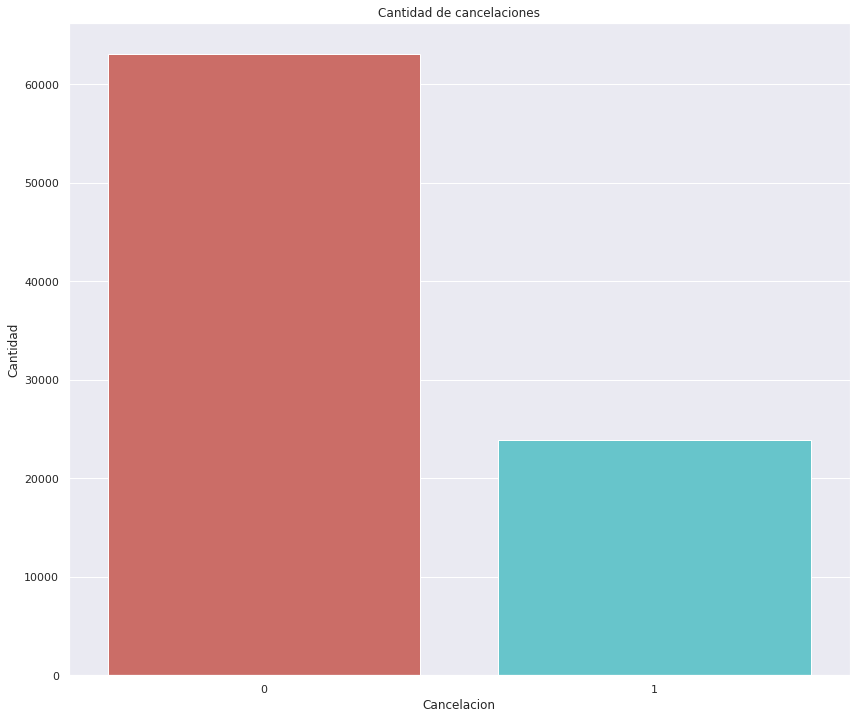

In [214]:
sb.set(rc={'figure.figsize':(14,12)})
graph = sb.countplot(x = 'is_canceled', data=base, palette = 'hls')
graph.set(title='Cantidad de cancelaciones')
graph.set_xlabel('Cancelacion', fontsize = 12)
graph.set_ylabel('Cantidad', fontsize = 12)
plt.show()

In [ ]:
base[(base.is_canceled == 0)] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,ESP,DEU,ITA,IRL,BEL,BRA,NLD,cancelacion,es_familia,season
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,...,0,0,0,0,0,0,0,No,0,Summer
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,...,0,0,0,0,0,0,0,No,0,Summer
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,...,0,0,0,0,0,0,0,No,0,Summer
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,0,0,0,No,0,Summer
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,0,0,0,No,0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,8,35,30,2,5,2,...,0,0,0,0,1,0,0,No,0,Summer
119386,City Hotel,0,102,2017,8,35,31,2,5,3,...,0,0,0,0,0,0,0,No,0,Summer
119387,City Hotel,0,34,2017,8,35,31,2,5,2,...,0,1,0,0,0,0,0,No,0,Summer
119388,City Hotel,0,109,2017,8,35,31,2,5,2,...,0,0,0,0,0,0,0,No,0,Summer


In [ ]:
base[(base.is_canceled == 1)] 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,ESP,DEU,ITA,IRL,BEL,BRA,NLD,cancelacion,es_familia,season
8,Resort Hotel,1,85,2015,7,27,1,0,3,2,...,0,0,0,0,0,0,0,Yes,0,Summer
9,Resort Hotel,1,75,2015,7,27,1,0,3,2,...,0,0,0,0,0,0,0,Yes,0,Summer
10,Resort Hotel,1,23,2015,7,27,1,0,4,2,...,0,0,0,0,0,0,0,Yes,0,Summer
27,Resort Hotel,1,60,2015,7,27,1,2,5,2,...,0,0,0,0,0,0,0,Yes,0,Summer
32,Resort Hotel,1,96,2015,7,27,1,2,8,2,...,0,0,0,0,0,0,0,Yes,0,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108829,City Hotel,1,25,2017,5,18,6,2,1,1,...,0,0,0,0,0,0,0,Yes,0,Spring
111355,City Hotel,1,4,2017,6,23,5,1,0,1,...,0,0,0,0,0,0,0,Yes,0,Summer
111924,City Hotel,1,7,2017,5,22,31,0,1,1,...,0,0,0,0,0,0,0,Yes,0,Spring
111925,City Hotel,1,6,2017,7,29,17,1,0,1,...,0,0,0,0,0,0,0,Yes,0,Summer


Por hotel

In [ ]:
canc_hotel = pd.crosstab(base.hotel , base.is_canceled,margins=True)
canc_hotel

is_canceled,0,1,All
hotel,,,
City Hotel,37101,15954,53055
Resort Hotel,25979,7974,33953
All,63080,23928,87008


In [ ]:
canc_hotel['porcentaje_cancelados']=canc_hotel[1]*100/canc_hotel['All']

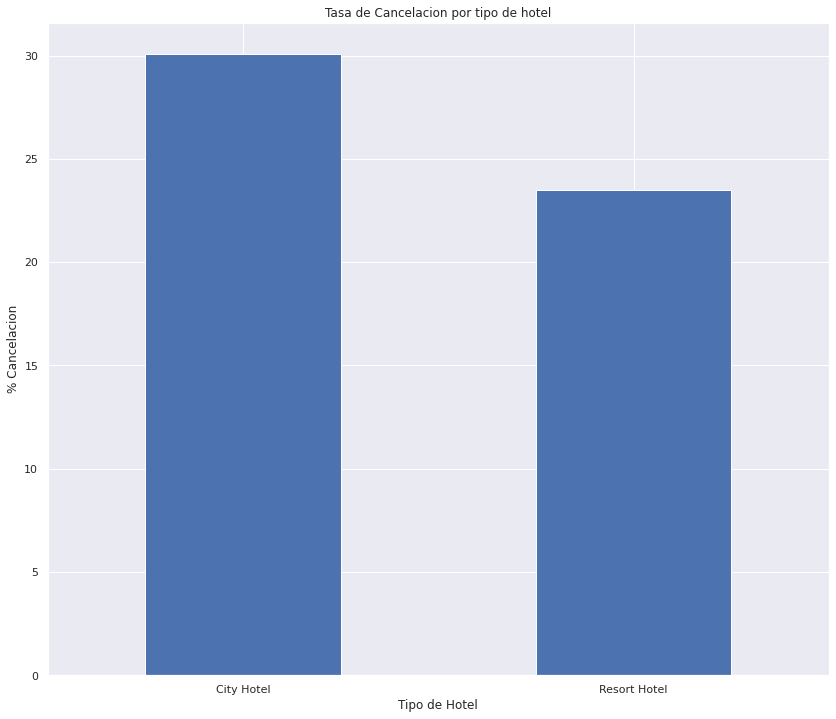

In [218]:
canc_hotel.drop('All',axis=0)['porcentaje_cancelados'].plot.bar()
plt.title('Tasa de Cancelacion por tipo de hotel')
plt.xlabel('Tipo de Hotel')
plt.xticks(rotation=0)
plt.ylabel('% Cancelacion')
plt.show()

Por anio

In [ ]:
canc_anio = pd.crosstab(base.arrival_date_year , base.is_canceled,margins=True)
canc_anio

is_canceled,0,1,All
arrival_date_year,,,
2015,10571,2698,13269
2016,31016,11152,42168
2017,21493,10078,31571
All,63080,23928,87008


In [ ]:
canc_anio['porcentaje_cancelados']=canc_anio[1]*100/canc_anio['All']

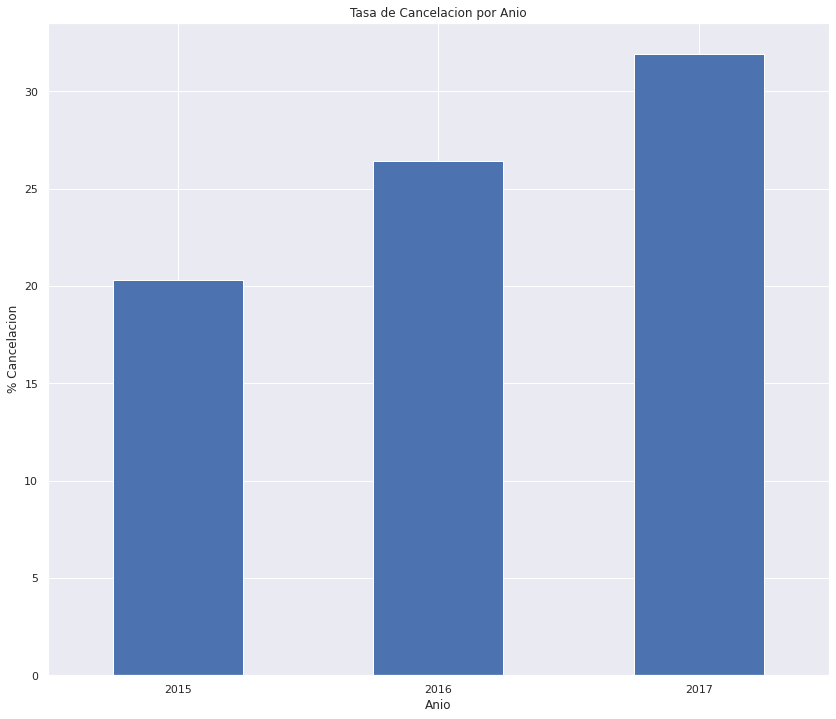

In [ ]:
canc_anio.drop('All',axis=0)['porcentaje_cancelados'].plot.bar()
plt.title('Tasa de Cancelacion por Anio')
plt.xlabel('Anio')
plt.xticks(rotation=0)
plt.ylabel('% Cancelacion')
plt.show()

Por Continente

In [ ]:
canc_cont = pd.crosstab(base.continente , base.is_canceled,margins=True)
canc_cont

is_canceled,0,1,All
continente,,,
Africa,557,432,989
Asia,2280,1135,3415
Europa,56317,20877,77194
Norteamerica,1523,470,1993
Oceania,345,97,442
Otros,465,77,542
Sudamerica,1593,840,2433
All,63080,23928,87008


In [ ]:
canc_cont['porcentaje_cancelados']=canc_cont[1]*100/canc_cont['All']

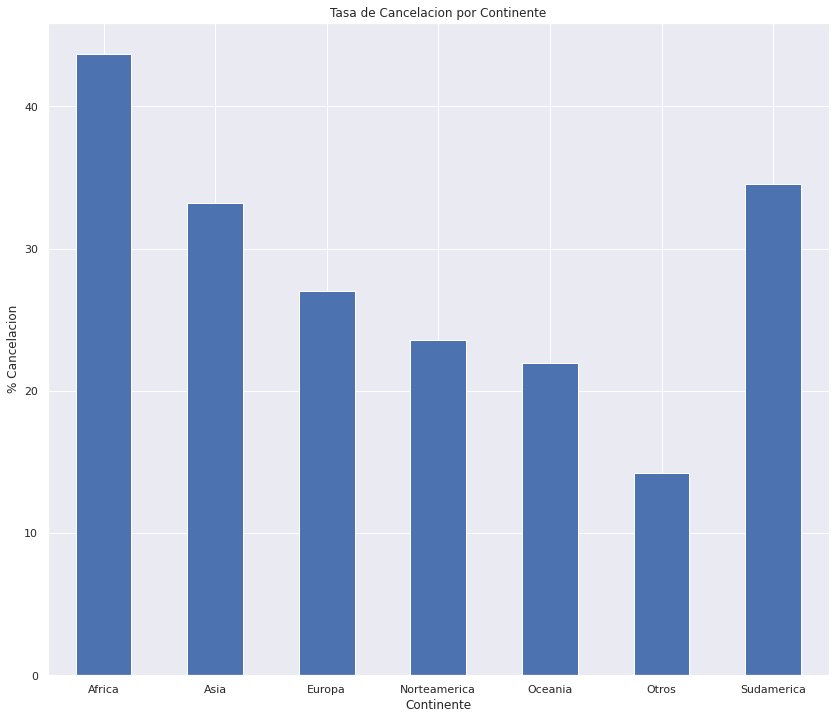

In [ ]:
canc_cont.drop('All',axis=0)['porcentaje_cancelados'].plot.bar()
plt.title('Tasa de Cancelacion por Continente')
plt.xlabel('Continente')
plt.xticks(rotation=0)
plt.ylabel('% Cancelacion')
plt.show()

## Split

In [ ]:
cols_seleccionadas = ['lead_time', 'required_car_parking_spaces', 'deposit_type', 'PRT',
                      'total_of_special_requests', 'previous_cancellations', 'customer_type', 'adr', 
                      'booking_changes', 'agent', 'previous_bookings_not_canceled', 'arrival_date_year', 'GBR', 'adults', 
                      'is_repeated_guest', 'noches_totales', 'stays_in_week_nights', 'FRA', 'assigned_room_type',
                      'children', 'DEU']

X = base[cols_seleccionadas]
y = base['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(69606, 21)
(17402, 21)
(69606,)
(17402,)


## Modelos

#### Para analizar cada modelo

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,average_precision_score
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score

In [ ]:
def evaluacion(y_test, pred):
  print('Accuracy Score:',accuracy_score(y_test, pred))
  print('f1_score:',f1_score(y_test, pred, average=None))
  print('Precision:',precision_score(y_test, pred, average=None))
  print('Recall:',recall_score(y_test, pred, average=None))
  print('Average Precision Score: ', average_precision_score(y_test, pred))
  print('\n')
  print('Classification report:\n',classification_report(y_test, pred))
  print('\n')
  print('Matriz de Confusion')
  ConfusionMatrixDisplay.from_predictions(y_test, pred)

#### Modelo: Arbol de Decision

In [ ]:
random_grid = {'criterion': ['gini', 'entropy','logloss'],
               'max_features': range(1,10),
               'max_depth': range(1,10),
               'min_samples_split': range(0,5),
               'min_samples_leaf': range(1,10)}

In [ ]:
arbol = DecisionTreeClassifier()
arbol_random = RandomizedSearchCV(estimator = arbol, param_distributions = random_grid, n_iter = 60, cv =5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
arbol_random.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
205 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 937, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got t

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=60,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'logloss'],
                                        'max_depth': range(1, 10),
                                        'max_features': range(1, 10),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(0, 5)},
                   random_state=42, verbose=2)

In [ ]:
arbol_random.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 8,
 'max_depth': 8,
 'criterion': 'gini'}

In [ ]:
best_arbol = arbol_random.best_estimator_

In [ ]:
best_arbol.score(X_train, y_train)

0.8034795850932391

In [ ]:
best_arbol.score(X_test, y_test)

0.8002528445006322

In [ ]:
preds_arbol = best_arbol.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds_arbol)
print("Metrica en Test:", score_pred)

Metrica en Test: 0.8002528445006322


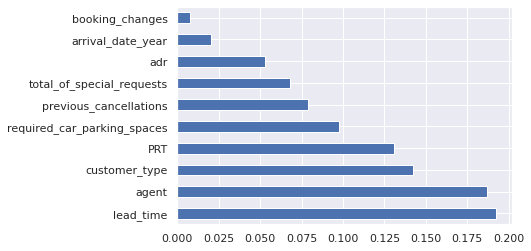

In [ ]:
%matplotlib inline
feature_importances = pd.Series(best_arbol.feature_importances_, index=cols_seleccionadas)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
kf = KFold(n_splits = 5)

scores = cross_val_score(best_arbol, X_train, y_train, cv = kf, scoring="accuracy")
print("Metricas cross_validation", scores)

Metricas cross_validation [0.7952162  0.81078945 0.76668343 0.79872136 0.77774585]


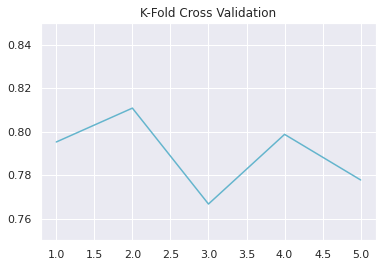

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = scores

plt.title('K-Fold Cross Validation')
plt.plot(x, y, color = 'c')
plt.ylim(0.75, 0.85)
plt.show()

#### Modelo: Random Forest

In [ ]:
# Cantidad de arboles
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 5)]
# Cantidad de features considerados en cada split
max_features = ['auto', 'sqrt']
# Maxima cantidad de profundidad de los arboles
max_depth = [int(x) for x in np.linspace(10, 200, num = 5)]
max_depth.append(None)
# Cantidad minima de smaples requeridos para partir un nodo
min_samples_split = [2, 5, 10, 25, 50]
# cantidad minima de samples requeridos por nodo hoja
min_samples_leaf = [1, 2, 4, 10, 20]
# Metodo de seleccion de los samples
bootstrap = [True]
#criterion
criterion=['gini', 'entropy', 'logloss']
#weights
class_weight=[{0:0.5,1:0.5}, {0:0.3,1:0.7}]
# Creo random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion,
               'class_weight': class_weight}

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 60, cv =5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': [{0: 0.5, 1: 0.5},
                                                         {0: 0.3, 1: 0.7}],
                                        'criterion': ['gini', 'entropy',
                                                      'logloss'],
                                        'max_depth': [10, 57, 105, 152, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20],
                                        'min_samples_split': [2, 5, 10, 25, 50],
                                        'n_estimators': [20, 90, 160, 230,
                                                         300]},
                   ran

In [ ]:
rf_random.best_params_

{'n_estimators': 160,
 'min_samples_split': 25,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'gini',
 'class_weight': {0: 0.5, 1: 0.5},
 'bootstrap': True}

In [ ]:
best_random = rf_random.best_estimator_

In [ ]:
preds_rf = best_random.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds_rf)
print("Metrica en Test:", score_pred)

Metrica en Test: 0.8437535915412021


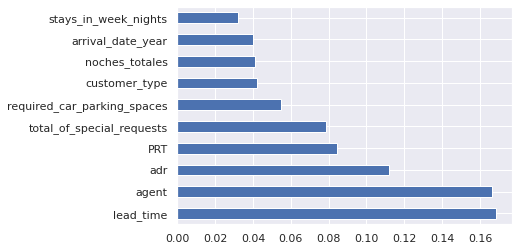

In [ ]:
%matplotlib inline
feature_importances = pd.Series(best_random.feature_importances_, index=cols_seleccionadas)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
kf = KFold(n_splits = 5)

scores = cross_val_score(best_random, X_train, y_train, cv = kf, scoring="accuracy")
print("Metricas cross_validation", scores)

Metricas cross_validation [0.84398793 0.84462323 0.8447669  0.84289922 0.84124704]


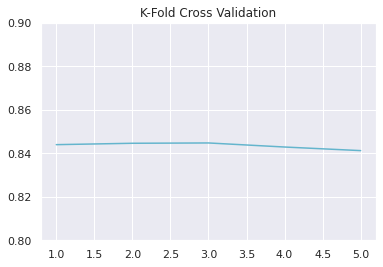

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = scores

plt.title('K-Fold Cross Validation')
plt.plot(x, y, color = 'c')
plt.ylim(0.80, 0.90)
plt.show()

#### Modelo: AdaBoost

In [ ]:
ada = AdaBoostClassifier(base_estimator = best_arbol)

In [ ]:
ada_random_grid = {'n_estimators':[int(x) for x in np.linspace(start = 20, stop = 300, num = 5)],
                'learning_rate':[.001,0.01,.1],
                'random_state':[42]}

ada_random = RandomizedSearchCV(estimator = ada, param_distributions = ada_random_grid, n_iter = 60, cv = 5, n_jobs = -1)

In [ ]:
ada_random.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 15 is smaller than n_iter=60. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8,
                                                                                      max_features=8)),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'n_estimators': [20, 90, 160, 230, 300],
                                        'random_state': [42]})

In [ ]:
ada_random.best_params_

{'random_state': 42, 'n_estimators': 300, 'learning_rate': 0.01}

In [ ]:
best_ada = ada_random.best_estimator_

In [ ]:
best_ada.score(X_test, y_test)

0.8426617630157454

In [ ]:
preds_ada = best_ada.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds_ada)
print("Metrica en Test:", score_pred)

Metrica en Test: 0.8426617630157454


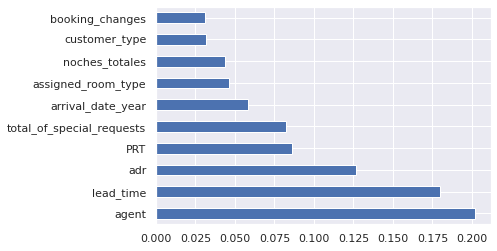

In [ ]:
%matplotlib inline
feature_importances = pd.Series(best_ada.feature_importances_, index=cols_seleccionadas)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
kf = KFold(n_splits = 5)

scores = cross_val_score(best_ada, X_train, y_train, cv = kf, scoring="accuracy")
print("Metricas cross_validation", scores)

Metricas cross_validation [0.84197673 0.84038503 0.84174987 0.84318655 0.84045686]


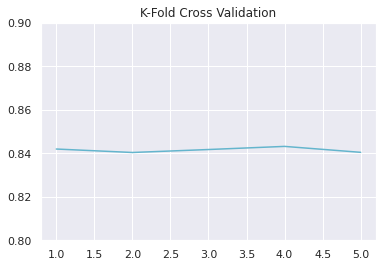

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = scores

plt.title('K-Fold Cross Validation')
plt.plot(x, y, color = 'c')
plt.ylim(0.80, 0.90)
plt.show()

#### Modelo: ExtraTrees

In [ ]:
# Cantidad de arboles
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 300, num = 5)]
# Cantidad de features considerados en cada split
max_features = ['auto', 'sqrt']
# Maxima cantidad de profundidad de los arboles
max_depth = [int(x) for x in np.linspace(10, 200, num = 5)]
max_depth.append(None)
# Cantidad minima de smaples requeridos para partir un nodo
min_samples_split = [2, 5, 10, 25, 50]
# cantidad minima de samples requeridos por nodo hoja
min_samples_leaf = [1, 2, 4, 10, 20]
# Metodo de seleccion de los samples
bootstrap = [True]
#criterion
criterion=['gini', 'entropy', 'logloss']
#weights
class_weight=[{0:0.5,1:0.5}, {0:0.3,1:0.7}]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion,
               'class_weight': class_weight}

In [ ]:
et = ExtraTreesClassifier()
et_random = RandomizedSearchCV(estimator = et, param_distributions = random_grid, n_iter = 60, cv =5, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
et_random.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py"

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_iter=60, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': [{0: 0.5, 1: 0.5},
                                                         {0: 0.3, 1: 0.7}],
                                        'criterion': ['gini', 'entropy',
                                                      'logloss'],
                                        'max_depth': [10, 57, 105, 152, 200,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10, 20],
                                        'min_samples_split': [2, 5, 10, 25, 50],
                                        'n_estimators': [20, 90, 160, 230,
                                                         300]},
                   random_state=42, verbose=2)

In [ ]:
et_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 25,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 152,
 'criterion': 'gini',
 'class_weight': {0: 0.5, 1: 0.5},
 'bootstrap': True}

In [ ]:
best_extra = et_random.best_estimator_

In [ ]:
preds_et = best_extra.predict(X_test)
score_pred = metrics.accuracy_score(y_test, preds_et)
print("Metrica en Test:", score_pred)

Metrica en Test: 0.8331226295828066


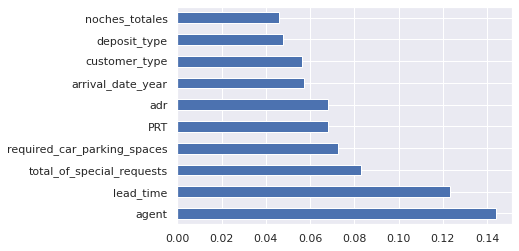

In [ ]:
%matplotlib inline
feature_importances = pd.Series(best_extra.feature_importances_, index=cols_seleccionadas)
feature_importances.nlargest(10).plot(kind='barh')

In [ ]:
kf = KFold(n_splits = 5)

scores = cross_val_score(best_extra, X_train, y_train, cv = kf, scoring="accuracy")
print("Metricas cross_validation", scores)

Metricas cross_validation [0.82947852 0.83815818 0.83348897 0.82939444 0.82917894]


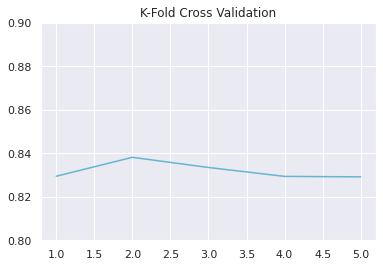

In [ ]:
x = np.array([1, 2, 3, 4, 5])
y = scores

plt.title('K-Fold Cross Validation')
plt.plot(x, y, color = 'c')
plt.ylim(0.80, 0.90)
plt.show()

#### **Metricas**

Arbol de Decision

Accuracy Score: 0.8002528445006322
f1_score: [0.86777237 0.59182715]
Precision: [0.83646231 0.66914498]
Recall: [0.90151755 0.53052632]
Average Precision Score:  0.48314521181095627


Classification report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87     12652
           1       0.67      0.53      0.59      4750

    accuracy                           0.80     17402
   macro avg       0.75      0.72      0.73     17402
weighted avg       0.79      0.80      0.79     17402



Matriz de Confusion


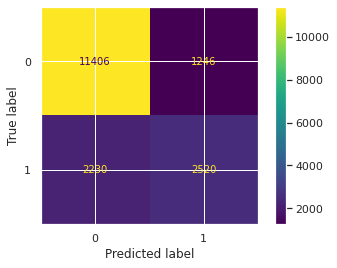

In [ ]:
evaluacion(y_test, preds_arbol)

Random Forest

Accuracy Score: 0.8437535915412021
f1_score: [0.89574786 0.68829531]
Precision: [0.86983394 0.7556003 ]
Recall: [0.92325324 0.632     ]
Average Precision Score:  0.577987615230527


Classification report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     12652
           1       0.76      0.63      0.69      4750

    accuracy                           0.84     17402
   macro avg       0.81      0.78      0.79     17402
weighted avg       0.84      0.84      0.84     17402



Matriz de Confusion


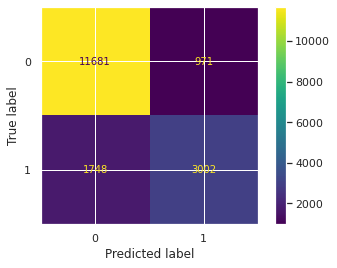

In [ ]:
evaluacion(y_test, preds_rf)

AdaBoost

Accuracy Score: 0.8426617630157454
f1_score: [0.89526433 0.68390672]
Precision: [0.86745738 0.75715746]
Recall: [0.92491306 0.62357895]
Average Precision Score:  0.5748942652372977


Classification report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90     12652
           1       0.76      0.62      0.68      4750

    accuracy                           0.84     17402
   macro avg       0.81      0.77      0.79     17402
weighted avg       0.84      0.84      0.84     17402



Matriz de Confusion


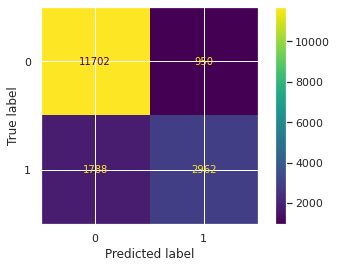

In [ ]:
evaluacion(y_test, preds_ada)

Extra Trees

Accuracy Score: 0.8331226295828066
f1_score: [0.8908845  0.64542125]
Precision: [0.84909039 0.76831395]
Recall: [0.93700601 0.55642105]
Average Precision Score:  0.5485840957587705


Classification report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89     12652
           1       0.77      0.56      0.65      4750

    accuracy                           0.83     17402
   macro avg       0.81      0.75      0.77     17402
weighted avg       0.83      0.83      0.82     17402



Matriz de Confusion


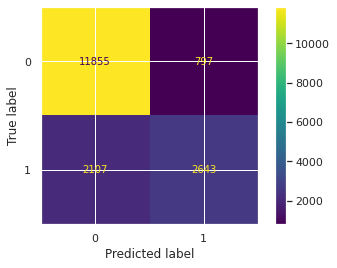

In [ ]:
evaluacion(y_test, preds_et)